In [22]:
import matplotlib.pyplot as plt
import argparse
import imghdr
import numpy
import os
import random
import scipy.misc
import scipy.ndimage
import matplotlib.pyplot

In [23]:
dataDirectory    = "DATA"
numTrainingFaces = 150
variance         = 0.95

if variance > 1.0:
    variance = 1.0
elif variance < 0.0:
    variance = 0.0


In [24]:
def enumerateImagePaths(root):
    filenames = list()
    for root, _, files in os.walk(dataDirectory):
        path = root.split('/')
        for f in files:
            filename = os.path.join(root, f)
            if imghdr.what(filename):
                filenames.append(filename)
    return filenames

filenames          = enumerateImagePaths(dataDirectory)
trainingImageNames = random.sample(filenames, numTrainingFaces)

In [25]:
#
# Choose training images
#

trainingImages = list()

for name in trainingImageNames:
    trainingImages.append( matplotlib.pyplot.imread(name) )


x,y = trainingImages[0].shape

print("No of train images", len(trainingImages))
print("Shape of a image:", trainingImages[0].shape)

No of train images 150
Shape of a image: (231, 195)


In [27]:
231 * 195

45045

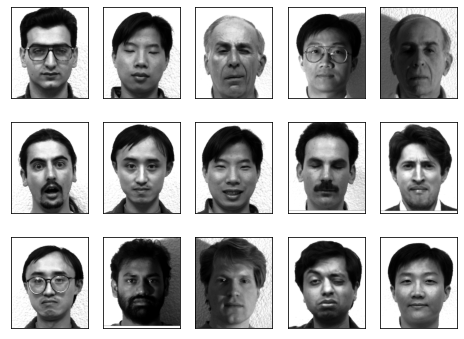

In [26]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):   
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(trainingImages[i],cmap=plt.cm.Greys_r)

In [8]:
#
# Calculate & subtract average face
#
meanFace = numpy.zeros(trainingImages[0].shape)

for image in trainingImages:
    meanFace += 1/numTrainingFaces * image

trainingImages = [ image - meanFace for image in trainingImages ] 


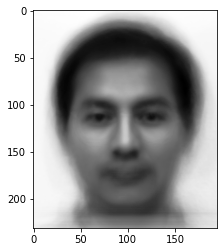

In [9]:
plt.imshow(meanFace.reshape((x,y)),cmap=plt.cm.Greys_r)
plt.show()

In [10]:
#
# Calculate eigenvectors
#
n   = x*y
A   = numpy.matrix( numpy.zeros((n,numTrainingFaces)) )

for i,image in enumerate(trainingImages):
    A[:,i] = numpy.reshape(image,(n,1))


In [11]:
A.shape

(45045, 150)

In [12]:
M                         = A.transpose()*A
eigenvalues, eigenvectors = numpy.linalg.eig(M)
indices                   = eigenvalues.argsort()[::-1]
eigenvalues               = eigenvalues[indices]
eigenvectors              = eigenvectors[:,indices]

eigenvalueSum           = sum(eigenvalues)
partialSum              = 0.0
numEffectiveEigenvalues = 0

In [13]:
for index,eigenvalue in enumerate(eigenvalues):
    partialSum += eigenvalue
    if partialSum / eigenvalueSum >= variance:
        print("Reached", variance * 100, "%", "explained variance with", index+1 , "eigenvalues")
        numEffectiveEigenvalues = index+1
        break

Reached 95.0 % explained variance with 63 eigenvalues


In [28]:
V = numpy.matrix( numpy.zeros((n,numEffectiveEigenvalues)) )
for i in range(numEffectiveEigenvalues):
    V[:,i] = A*eigenvectors[:,i]

In [29]:
V.shape

(45045, 63)

In [30]:
#
# Transform remaining images into "face space"
#

remainingImages = list()

for name in filenames:
    if name not in trainingImageNames:
        remainingImages.append( matplotlib.pyplot.imread(name) )

remainingImages = [ image - meanFace for image in remainingImages ]

print(len(remainingImages))

15


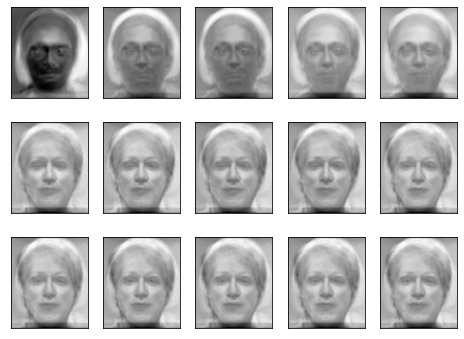

In [16]:
fig = plt.figure(figsize=(8, 6))

image = remainingImages[0]

weights = list()

for i in range(15):
    weights.append( (V[:,i].transpose() * image.reshape((n,1))).tolist()[0][0] )

    reconstruction = numpy.matrix( numpy.zeros((n,1)) )
    for i,w in enumerate(weights):
        reconstruction += w*V[:,i]
    
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(reconstruction.reshape((x,y)),cmap=plt.cm.Greys_r)


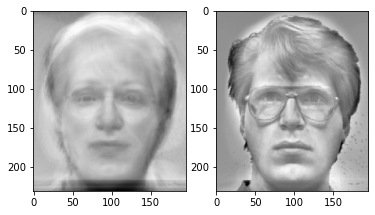

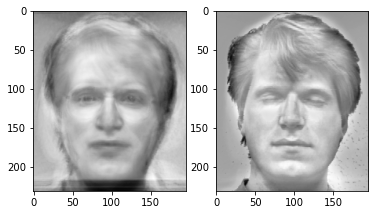

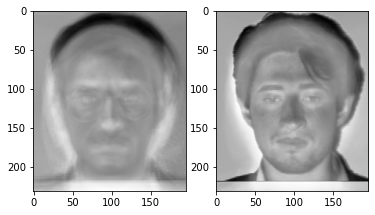

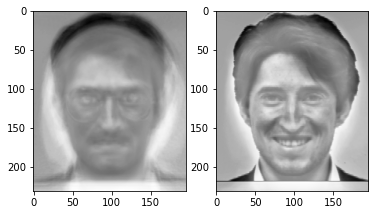

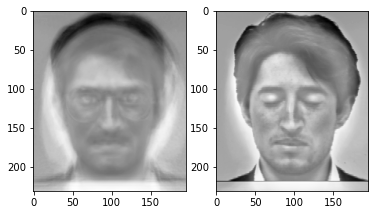

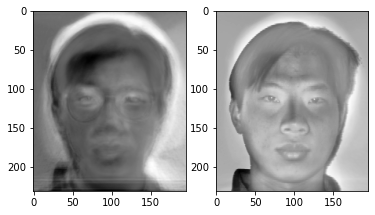

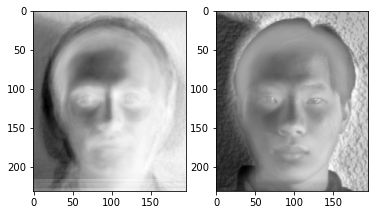

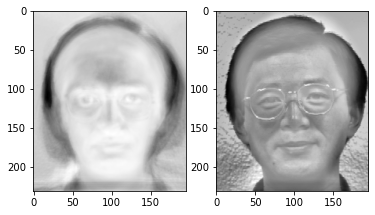

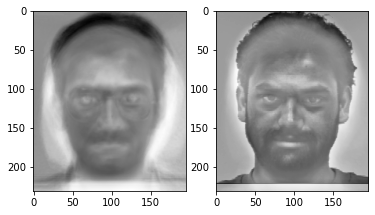

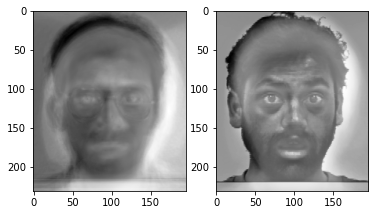

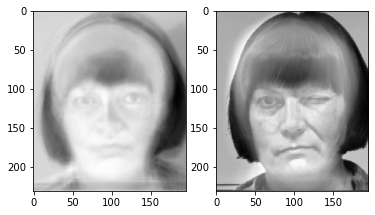

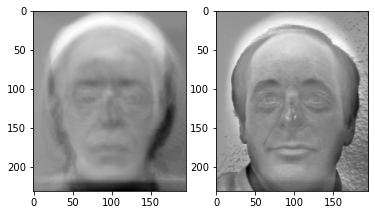

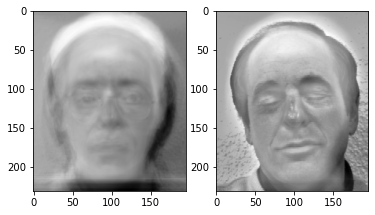

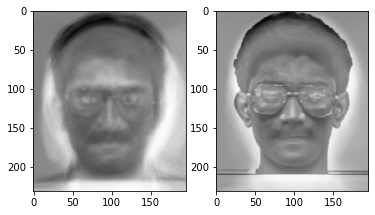

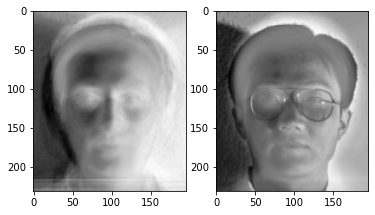

In [34]:
for image in remainingImages:
    weights = list()

    for i in range(15):
        weights.append( (V[:,i].transpose() * image.reshape((n,1))).tolist()[0][0] )

    reconstruction = numpy.matrix( numpy.zeros((n,1)) )
    for i,w in enumerate(weights):
        reconstruction += w*V[:,i]

    f = plt.figure()
    f.add_subplot(1, 2, 1)
    plt.imshow(reconstruction.reshape((x,y)),cmap=plt.cm.Greys_r)
    f.add_subplot(1, 2, 2)
    plt.imshow(image.reshape((x,y)),cmap=plt.cm.Greys_r)
    plt.show()

In [18]:
#https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

In [35]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [36]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

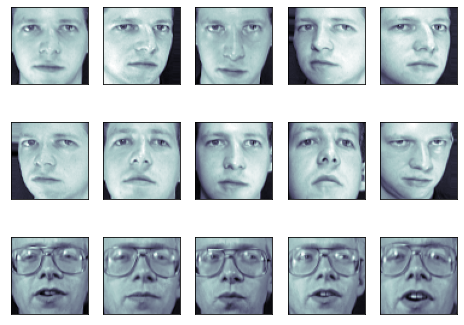

In [37]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [39]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150)
pca.fit(X_train)

PCA(n_components=150)

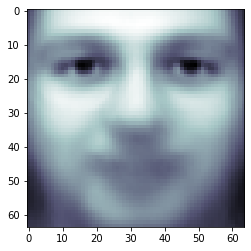

In [40]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

In [41]:
print(pca.components_.shape)

(150, 4096)


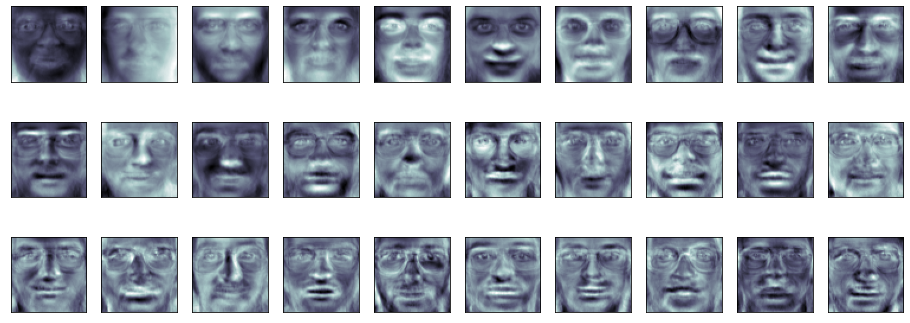

In [42]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [43]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [44]:
print(X_test_pca.shape)

(100, 150)


In [45]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

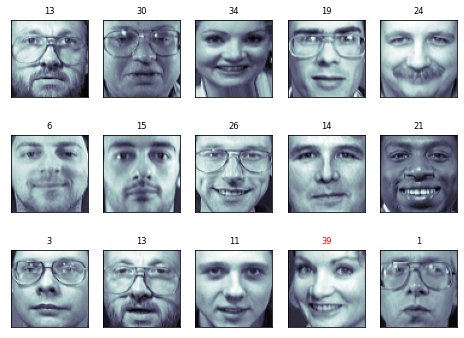

In [46]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [47]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         4
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      0.80      0.89         5
          15       0.60      1.00      0.75         3
          17       1.00      0.33      0.50         6
          19       1.00    

C:\Users\sarka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
